# Nose Cone Designs:
The shapes included are Conical, Bi-Conic, Power-Series, Tangent Ogive, Secant Ogive, Elliptical, Parabolic Series, and Haack Series.

See 'The Descriptive Geometry of Nose Cones' written by Gary A. Crowell Sr. for deeper explanations.

In [97]:
import numpy as np
import NoseConeEquations as nosecone
import matplotlib.pyplot as plt
%matplotlib inline

General Dimensions:

User should edit these. These are values common among all nosecone shapes.

In [98]:
units = 'cm'
radius = 8 #radius of the base of the nosecone
length = 50 #overall length of nosecone (excluding shoulder for mounting to body tube)

X Values and Centerline (don't edit)

In [99]:
x = np.linspace(0, length, num=101)
cl = x * 0

## Nose Cone Shapes

### Conical:
 - Very common
 - Easy to Manufacture
 - Often (mis)chosen for its drag characteristics

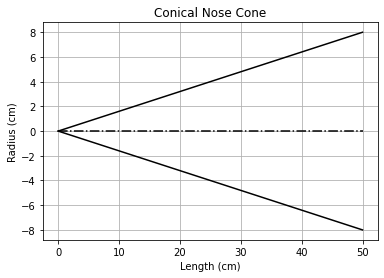

In [100]:
y_top = [nosecone.conical_shape(x, radius, length) for x in x]
y_bot = [-1 * y for y in y_top]
plt.plot(x, y_top, 'k')
plt.plot(x, y_bot, 'k')
plt.plot(x, cl, 'k-.')
plt.grid()
plt.title("Conical Nose Cone")
plt.xlabel("Length ({})".format(units))
plt.ylabel("Radius ({})".format(units))
plt.show()

### Bi-conic:
- Cone stacked on top of frustrum of a cone

Additional parameters are required (edit these):

In [101]:
topcone_length = 10 #length of the top cone
topcone_radius = 4 #radius of the top cone

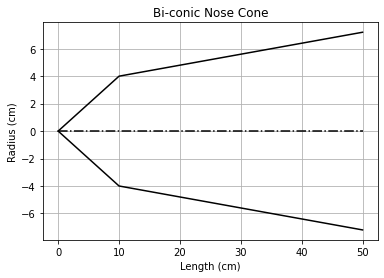

In [102]:
y_top = [nosecone.biconic_shape(x, topcone_radius, topcone_length, radius, length) for x in x]
y_bot = [-1 * y for y in y_top]
plt.plot(x, y_top, 'k')
plt.plot(x, y_bot, 'k')
plt.plot(x, cl, 'k-.')
plt.grid()
plt.title("Bi-conic Nose Cone")
plt.xlabel("Length ({})".format(units))
plt.ylabel("Radius ({})".format(units))
plt.show()

### Power-Series:
- Generated by rotating a parabola about its axis
- power factor controls bluntness of shape
    - As the power decreases towards zero, the nose shape becomes increasingly blunt
    - At values of the power above around 0.7, the tip becomes sharp

Additional parameters are required (edit these):

In [103]:
power = 0.75
# 1 is a cone
# 0.75 is a 3/4 power
# 0.5 is a 1/2 power (parabola)
# 0 is a cylinder

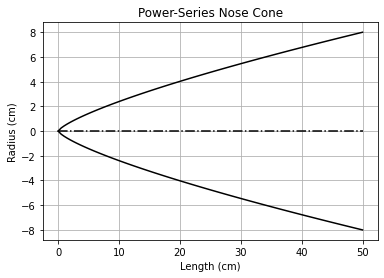

In [104]:
y_top = [nosecone.powerseries_shape(x, radius, length, power) for x in x]
y_bot = [-1 * y for y in y_top]
plt.plot(x, y_top, 'k')
plt.plot(x, y_bot, 'k')
plt.plot(x, cl, 'k-.')
plt.grid()
plt.title("Power-Series Nose Cone")
plt.xlabel("Length ({})".format(units))
plt.ylabel("Radius ({})".format(units))
plt.show()

### Tangent Ogive:
- After the cone shape, this is most familiar in hobby rocketry
- Formed by a segment of a circle such that the rocket body is tangent to the curve at the base of the nosecone.
- Popularity is largely due to ease of construction

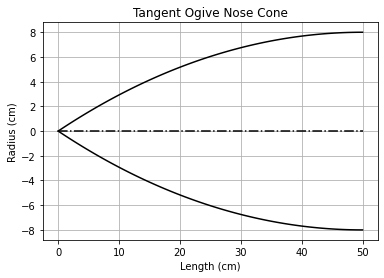

In [105]:
y_top = [nosecone.tangent_ogive_shape(x, radius, length) for x in x]
y_bot = [-1 * y for y in y_top]
plt.plot(x, y_top, 'k')
plt.plot(x, y_bot, 'k')
plt.plot(x, cl, 'k-.')
plt.grid()
plt.title("Tangent Ogive Nose Cone")
plt.xlabel("Length ({})".format(units))
plt.ylabel("Radius ({})".format(units))
plt.show()

### Secant Ogive:
- Similar to the Tangent Ogive, but the base of the shape is not on the radius of the circle defined by the ogive radius
- The rocket body will NOT be tangent to the curve of the nosecone at its base

Assistive Calculations (don't edit, but use in the determination of the value of rho):

In [106]:
print(f'Rho must be greater than {2 * length} ({units}) (twice the length of the nosecone).')
print(f'If rho value is greater than {nosecone.ogive_radius(radius, length)} ({units}), the secant ogive nosecone appears as a tangent ogive with a portion of the base truncated.')
print(f'If rho value is less than {nosecone.ogive_radius(radius, length)} ({units}), then the secant nosecone will have a maximum diameter greater than the base (a bulge will result).')

Rho must be greater than 100 (cm) (twice the length of the nosecone).
If rho value is greater than 160.25 (cm), the secant ogive nosecone appears as a tangent ogive with a portion of the base truncated.
If rho value is less than 160.25 (cm), then the secant nosecone will have a maximum diameter greater than the base (a bulge will result).


Additional parameters are required (edit these):

In [107]:
rho = 120 #ogive radius

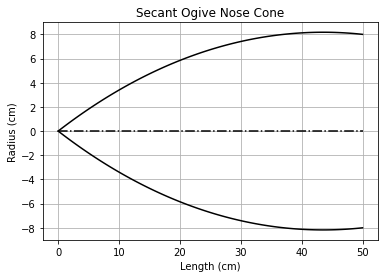

In [108]:
y_top = [nosecone.secant_ogive_shape(x, radius, length, rho) for x in x]
y_bot = [-1 * y for y in y_top]
plt.plot(x, y_top, 'k')
plt.plot(x, y_bot, 'k')
plt.plot(x, cl, 'k-.')
plt.grid()
plt.title("Secant Ogive Nose Cone")
plt.xlabel("Length ({})".format(units))
plt.ylabel("Radius ({})".format(units))
plt.show()